In [1]:
# Importing Libaries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import tensorflow as tf

In [2]:
df = pd.read_csv('HeartDisease.csv')
df.shape

(1025, 14)

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
target_count = df['target'].value_counts()
target_count

target
1    526
0    499
Name: count, dtype: int64

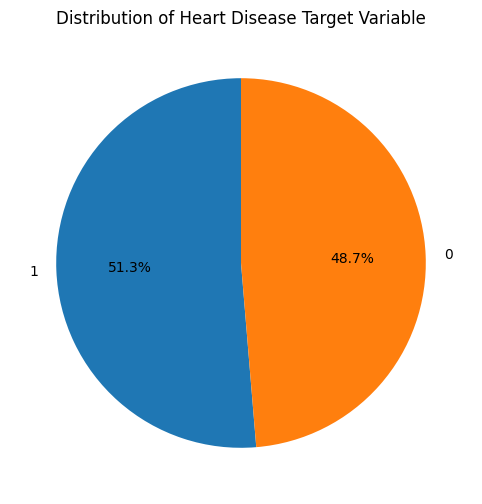

In [7]:
plt.figure(figsize=(8, 6))

plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Heart Disease Target Variable')
plt.show()

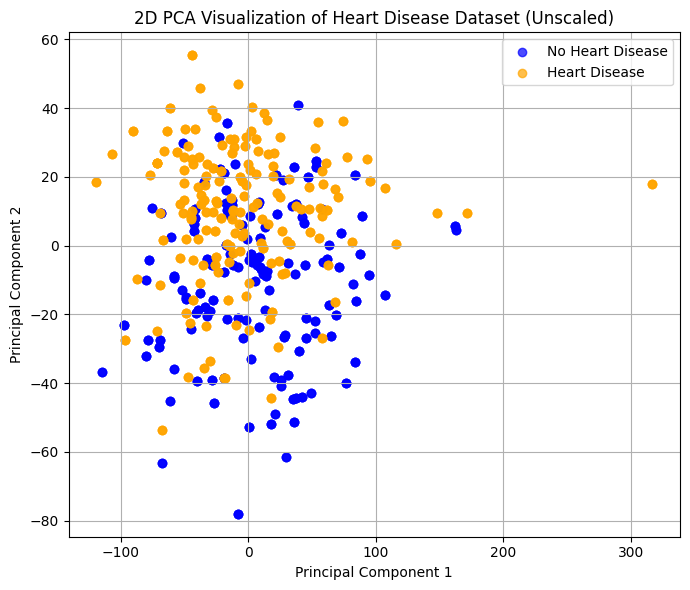

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('target', axis=1))

# Scatter plot based on the target
plt.figure(figsize=(7, 6))
plt.scatter(X_pca[df['target'] == 0, 0], X_pca[df['target'] == 0, 1], c='blue', label='No Heart Disease', alpha=0.7)
plt.scatter(X_pca[df['target'] == 1, 0], X_pca[df['target'] == 1, 1], c='orange', label='Heart Disease', alpha=0.7)
plt.title("2D PCA Visualization of Heart Disease Dataset (Unscaled)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<hr>

In [9]:
# Splitting the dataset into training and testing sets
X = df.drop('target', axis=1)
Y = df['target']

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (1025, 13)
Shape of Y: (1025,)


In [10]:
# Splitting the dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=42)

In [11]:
print("Training set shape:", X_train.shape, Y_train.shape)
print("Validation set shape:", X_val.shape, Y_val.shape)

Training set shape: (717, 13) (717,)
Validation set shape: (308, 13) (308,)


<hr>

<h2><b>Building the MLP</b></h2>

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(13,)),
    tf.keras.layers.Dense(16, activation='relu', name='hidden_layer1'),
    tf.keras.layers.Dense(8, activation='relu', name='hidden_layer2'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer1 (Dense)           │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer2 (Dense)           │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs = 250,
    batch_size=32  # Mini-batch gradient descent
)

Epoch 1/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5401 - loss: 7.6515 - val_accuracy: 0.5714 - val_loss: 2.1805
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5339 - loss: 1.9987 - val_accuracy: 0.6688 - val_loss: 1.3718
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6747 - loss: 1.2240 - val_accuracy: 0.6591 - val_loss: 1.1064
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7050 - loss: 0.9766 - val_accuracy: 0.6656 - val_loss: 0.9475
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6758 - loss: 0.9025 - val_accuracy: 0.6721 - val_loss: 0.8482
Epoch 6/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6803 - loss: 0.8442 - val_accuracy: 0.6558 - val_loss: 0.7925
Epoch 7/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6689 - loss: 0.6905 - val_accuracy: 0.6818 - val_loss: 0.7604
Epoch 8/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6871 - loss: 0.7312 - val_accuracy: 0.6234 - v

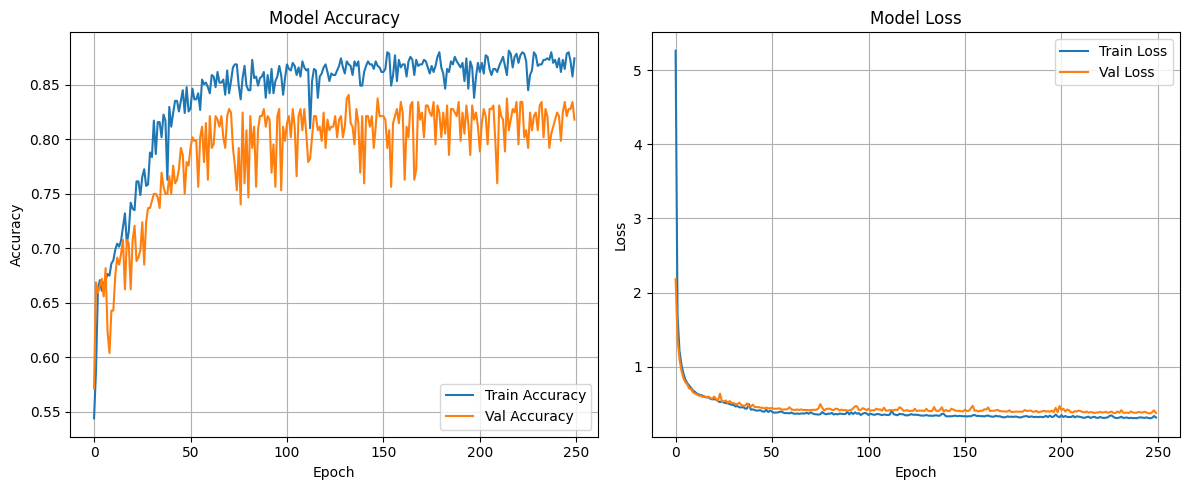

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Val Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Plot loss
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Val Loss')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

# Layout and show
plt.tight_layout()
plt.show()

After 100 epochs, model is not learning anything. Its losses (accuracies) are just oscillating up and down.

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 7s 904us/step


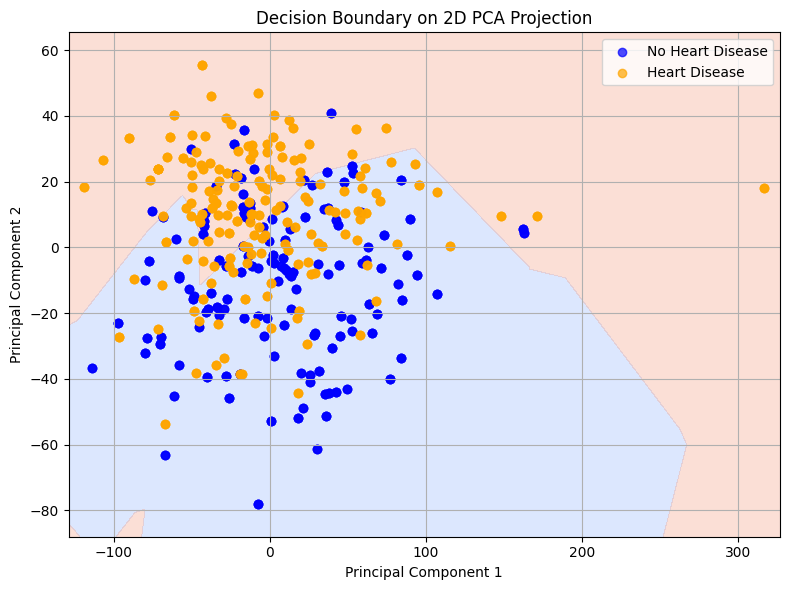

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Reuse the PCA you already applied
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('target', axis=1))
y = df['target']

# Step 1: Fit your model on the original 13D input
# (Assuming you've already done this and your model is named 'model')

# Step 2: Create a mesh grid over PCA space
x_min, x_max = X_pca[:, 0].min() - 10, X_pca[:, 0].max() + 10
y_min, y_max = X_pca[:, 1].min() - 10, X_pca[:, 1].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Step 3: Inverse-transform the grid back to 13D feature space
grid_pca = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid_pca)  # Back to original 13D

# Step 4: Predict with your model
preds = model.predict(grid_original)
Z = preds.reshape(xx.shape)

# Step 5: Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.3)

# Step 6: Overlay the actual PCA scatter points
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], c='blue', label='No Heart Disease', alpha=0.7)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], c='orange', label='Heart Disease', alpha=0.7)

plt.title("Decision Boundary on 2D PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<hr>

## <b>Sample Prediction</b>

In [24]:
sample = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])  # Example input
prediction = model.predict(sample)

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.81755966]]


In [23]:
if(prediction[0][0] > 0.5):
    print("Have Heart Disease")
else:
    print("No Heart Disease")


No Heart Disease


<hr>